In [4]:
import os, time

import numpy as np
np.random.seed(42)

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# Dataset from https://github.com/mubaris/friendly-fortnight

# Declaring header
header = ['V1','V2']

# Affinity and Linkage
af_type = 'euclidean'
lk_type = 'complete'

# Reading the data
folderName = '../data/' 
fileName   = 'xclara.data'

df = pd.read_csv(folderName+fileName,sep=',',names=header)

# Printing some info about the data
print("[INFO]\nNrow: {}\nNcol: {}".format(df.shape[0],df.shape[1]))
df.head(3)

[INFO]
Nrow: 3000
Ncol: 2


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176


In [27]:
df.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


In [28]:
# # If necessary, dropping cols
# cols = df.columns # List of columns in dataframe
# drop = [cols[-1]] # List of columns to drop
# df.drop(labels=drop,axis=1,inplace=True)
# df.head(3)

In [29]:
# Importing Clustering library
from sklearn.cluster import AgglomerativeClustering

# For dendogram
from scipy.cluster import hierarchy

# For distance
from scipy.spatial.distance import pdist

In [30]:
# Calculating the condensed distance matrix
# (flat array containing the upper triangular of the distance matrix)
dist_mat = pdist(df, metric=af_type)

# Creating hierarchy
linkage_matrix = hierarchy.linkage(dist_mat, method=lk_type, metric=af_type)

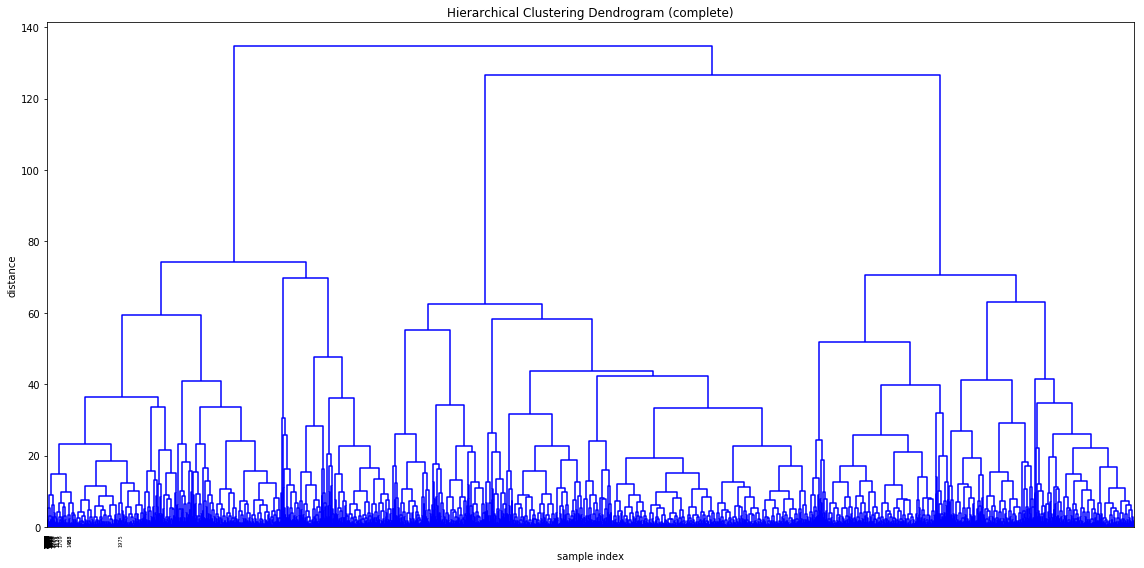

In [31]:
# Plotting out
fig, ax = plt.subplots(1,1,figsize=(16, 8))

hierarchy.dendrogram(linkage_matrix,
                     color_threshold=0,
                     ax=ax)
ax.set_title('Hierarchical Clustering Dendrogram ('+lk_type+')')
ax.set_xlabel('sample index')
ax.set_ylabel('distance')
ax.set_xticks(linkage_matrix[::3,3])
fig.tight_layout()
plt.show()

In [38]:
# Executando corte do dendograma na altura de 2.3
cutree_cluster = hierarchy.cut_tree(linkage_matrix, height=82.0)
# Criando coluna de cluster
df['cluster'] = cutree_cluster
# Transferindo valores do frame para array
data = df.values

In [39]:
# Metodologia para determinação do centróide de cada um dos clusters
def centroid(df,data):
    mean=[]
    for i in list(set(df['cluster'])):
        # Procurando os índices dos dados que 
        # forem iguais ao cluster alvo
        inx = np.where(data[:,-1]==i)
        # Calculando o centróide do cluster alvo
        mean.append(df.iloc[inx].mean().values)
    # Retornando centróides em array sem última
    # coluna, pois contém o número do cluster
    return np.array(mean)[:,:-1]

# Final cluster centroids (hierarchy)   
centroids = centroid(df,data)
print("Centroids:\n",centroids)
# Inferindo o número de clusters 
n_clusters = centroids.shape[0]

Centroids:
 [[  9.44819973  10.63424053]
 [ 40.65266421  59.67107538]
 [ 69.92418447 -10.11964119]]


In [40]:
# Package k-means 
from sklearn.cluster import KMeans

# Invoking k-means class
kmeans = KMeans(n_clusters=n_clusters, # Number of clusters
                init=centroids,        # Centroids initial position
                n_init=1,
                max_iter=100,          # Max number of iterations
                verbose=False).fit(df.iloc[:,:-1])

In [41]:
# Final cluster centroids (KMeans)
print(kmeans.cluster_centers_)

[[  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]]


# Data analysis

In [42]:
# Importing Clustering library
from sklearn.cluster import AgglomerativeClustering
# Importing scatter matrix
from pandas.plotting import scatter_matrix


# Invoking AgglomerativeClustering class
Hclustering = AgglomerativeClustering(n_clusters=n_clusters,
                                      affinity=af_type, 
                                      linkage=lk_type).fit(df.iloc[:,:-1])

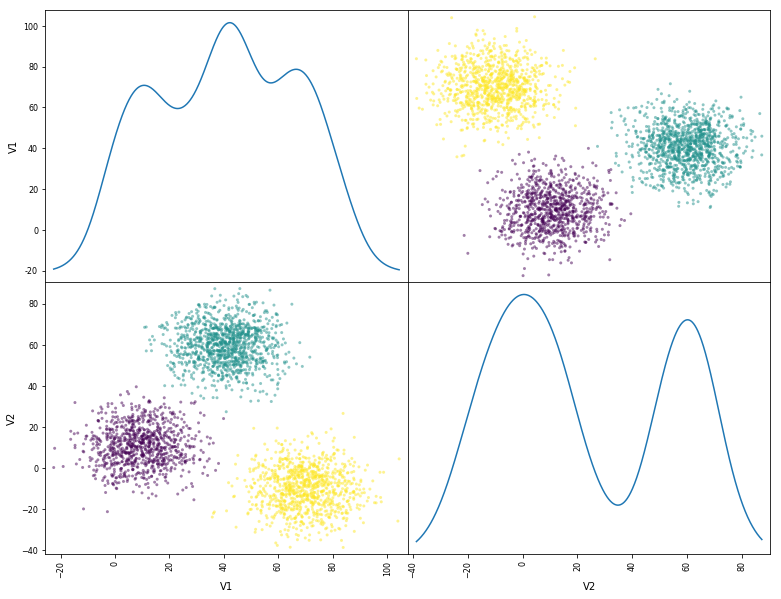

In [43]:
# K-MEANS CLUSTERING
# Plotting the scatter matrix 
spm = scatter_matrix(df.iloc[:,:-1], alpha=0.5, figsize=(13, 10), diagonal='kde', 
                     c=kmeans.labels_, facecolors=None)
plt.show()

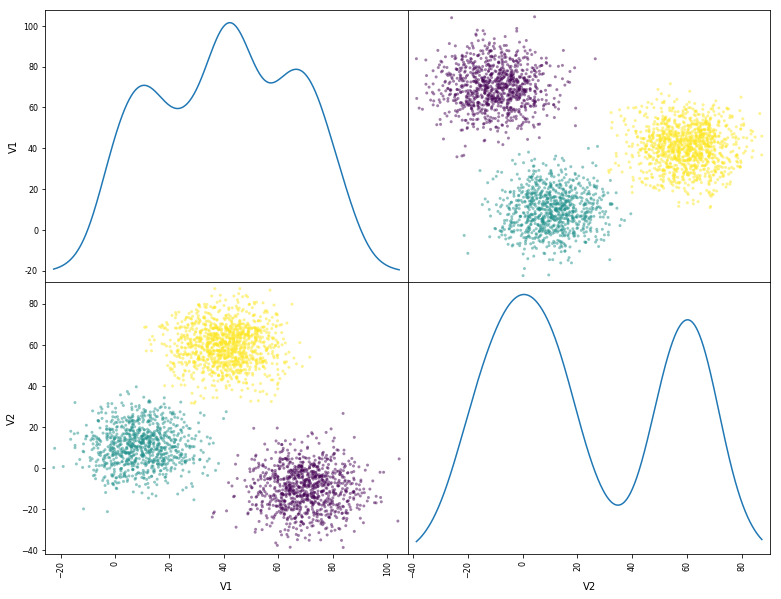

In [44]:
# HIERARCHICAL CLUSTERING
# Plotting the scatter matrix 
spm = scatter_matrix(df.iloc[:,:-1], alpha=0.5, figsize=(13, 10), diagonal='kde', 
                     c=Hclustering.labels_, facecolors=None)
plt.show()